In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

print(f"Tensorflow version: {tf.version.VERSION}")
tf.config.experimental.list_physical_devices('GPU')

Tensorflow version: 2.8.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras import optimizers, losses, metrics

In [48]:
UFC_Data = pd.read_csv('./ufc-master.csv')
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,Kick,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Kick,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0


In [49]:
#Where did i get this? from first project
def Categorize_Winner(df):
    df['Winner_Categorized'] = df['Winner'].astype('category')

    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

UFC_Data = Categorize_Winner(UFC_Data)
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0,0


In [50]:
#UFC_Data.isnull().sum()
df = pd.DataFrame(UFC_Data.dropna(axis='columns'))
df = pd.DataFrame(df.dropna())
df.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.54,-7.62,-7,1.98,0.1,0.74,1,1,Red,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,5.08,10.16,0,-0.93,1.0,-0.48,1,1,neither,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,5.08,-1,2.75,0.0,0.03,1,1,neither,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,-2.54,1,1.51,0.0,-2.75,1,1,neither,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,neither,0


In [51]:
#Where did i get this? From first project.
non_num = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64":
        non_num.append(col)
non_num.remove("Winner_Categorized")
df = pd.DataFrame(df.drop(columns = non_num))
df.head()


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [52]:
print(df.isna().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [53]:
print(df.isnull().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [54]:
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")
df.head()

It contains 0 infinite values


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [55]:
train_df, test_df = train_test_split(df, test_size = 0.3)
test_df, validation_df = train_test_split(test_df, test_size = 0.5)
print("Training Dataset Shape: ", train_df.shape)
print("Validation Dataset Shape: ", validation_df.shape)
print("Test Dataset Shape: ", test_df.shape)

Training Dataset Shape:  (3369, 59)
Validation Dataset Shape:  (722, 59)
Test Dataset Shape:  (722, 59)


In [56]:
#Class for him is Winner_Categorized for us
train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
R_odds,3369.0,-119.505491,268.919514,-1667.000000,-255.000000,-150.000000,125.000000,775.000000
B_odds,3369.0,67.040368,248.071467,-1200.000000,-145.000000,130.000000,220.000000,1300.000000
R_ev,3369.0,94.486630,82.871584,5.998800,39.215686,66.666667,125.000000,775.000000
B_ev,3369.0,167.715926,137.373806,8.333333,68.965517,130.000000,220.000000,1300.000000
no_of_rounds,3369.0,3.195904,0.591082,3.000000,3.000000,3.000000,3.000000,5.000000
B_current_lose_streak,3369.0,0.478183,0.773416,0.000000,0.000000,0.000000,1.000000,6.000000
B_current_win_streak,3369.0,0.893143,1.338443,0.000000,0.000000,0.000000,1.000000,12.000000
B_draw,3369.0,0.010092,0.108511,0.000000,0.000000,0.000000,0.000000,2.000000
B_longest_win_streak,3369.0,1.796379,1.935902,0.000000,0.000000,1.000000,3.000000,17.000000
B_losses,3369.0,1.724547,2.101237,0.000000,0.000000,1.000000,3.000000,15.000000


In [57]:
train_df.shape

(3369, 59)

In [58]:
Y_train = train_df.pop('Winner_Categorized')
Y_validation = validation_df.pop('Winner_Categorized')
Y_test = test_df.pop('Winner_Categorized')

In [59]:
train_stats = train_stats.transpose()
train_stats = train_stats.drop(columns = ['Winner_Categorized'])
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normalized_train_df = norm(train_df)
normalized_test_df = norm(test_df)
normalized_validation_df = norm(validation_df)

In [60]:
print("Train/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)

Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [61]:
def build_NN_model(model_optimizer, model_loss, first_HL_node_count, second_HL_node_count = 4, second_HL = False):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(first_HL_node_count, Activation('relu')))
    if second_HL:
        model.add(Dense(second_HL_node_count, Activation('relu')))

    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [62]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)
first_HL_node_count = 16
second_HL = False

model = build_NN_model(model_optimizer=model_optimizer, model_loss=model_loss, first_HL_node_count=first_HL_node_count, second_HL=second_HL)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                944       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [63]:
EPOCHS = 100
batch_sz = 100

In [64]:
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.4106 - val_loss: nan - val_accuracy: 0.4377
Epoch 2/100
33/33 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.4078 - val_loss: nan - val_accuracy: 0.4377
Epoch 3/100
33/33 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4090 - val_loss: nan - val_accuracy: 0.4377
Epoch 4/100
33/33 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4105 - val_loss: nan - val_accuracy: 0.4377
Epoch 5/100
33/33 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4090 - val_loss: nan - val_accuracy: 0.4377
Epoch 6/100
33/33 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4096 - val_loss: nan - val_accuracy: 0.4377
Epoch 7/100
33/33 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4069 - val_loss: nan - val_accuracy: 0.4377
Epoch 8/100
33/33 [=============================

In [65]:
print('Summary of results after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

Summary of results after each epoch:
    loss  accuracy  val_loss  val_accuracy  epoch
0    NaN  0.410606       NaN      0.437673      0
1    NaN  0.407770       NaN      0.437673      1
2    NaN  0.408994       NaN      0.437673      2
3    NaN  0.410523       NaN      0.437673      3
4    NaN  0.408994       NaN      0.437673      4
..   ...       ...       ...           ...    ...
95   NaN  0.410829       NaN      0.437673     95
96   NaN  0.407158       NaN      0.437673     96
97   NaN  0.416029       NaN      0.437673     97
98   NaN  0.401346       NaN      0.437673     98
99   NaN  0.416641       NaN      0.437673     99

[100 rows x 5 columns]


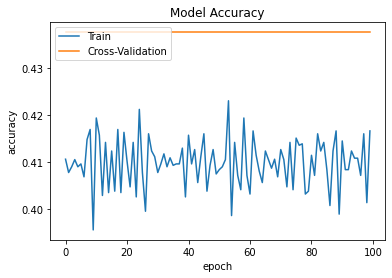

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

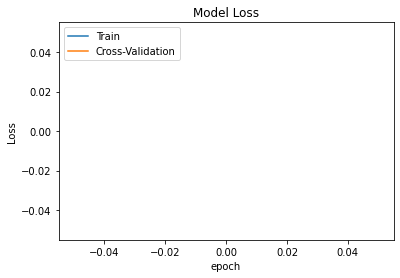

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

In [68]:
print("Train Split:")
loss, accuracy = model.evaluate(normalized_train_df, Y_train, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Train Split:
106/106 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.4099
Accuracy:  0.41


In [69]:
print("Validation Split:")
loss, accuracy = model.evaluate(normalized_validation_df, Y_validation, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Validation Split:
23/23 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4377
Accuracy:  0.44


In [70]:
print("Test Split:")
loss, accuracy = model.evaluate(normalized_test_df, Y_test, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Test Split:
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4238
Accuracy:  0.42


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

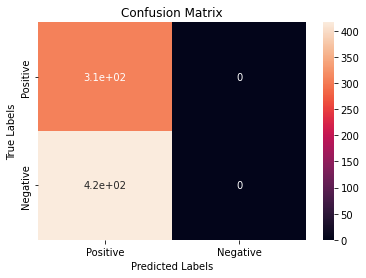

In [71]:
ax = plt.subplot()
predict_results = model.predict(normalized_test_df)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(Y_test, predict_results)

sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [72]:
def build_NN2_model(model_optimizer, model_loss):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(32, Activation('relu')))
    model.add(Dense(24, Activation('relu')))
    model.add(Dense(16, Activation('relu')))
    model.add(Dense(8, Activation('relu')))
    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [73]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)

model = build_NN2_model(model_optimizer=model_optimizer, model_loss=model_loss)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                1888      
                                                                 
 dense_26 (Dense)            (None, 24)                792       
                                                                 
 dense_27 (Dense)            (None, 16)                400       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,225
Trainable params: 3,225
Non-trainable params: 0
_________________________________________________________________


In [74]:
EPOCHS = 10
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/10
33/33 [==============================] - 4s 44ms/step - loss: nan - accuracy: 0.4106 - val_loss: nan - val_accuracy: 0.4377
Epoch 2/10
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4078 - val_loss: nan - val_accuracy: 0.4377
Epoch 3/10
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4377
Epoch 4/10
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4377
Epoch 5/10
33/33 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.4377
Epoch 6/10
33/33 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.4059 - val_loss: nan - val_accuracy: 0.4377
Epoch 7/10
33/33 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.4099 - val_loss: nan - val_accuracy: 0.4377
Epoch 8/10
33/33 [==============================] - 0s 

In [75]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN3_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(32, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.25))
    #model.add(Dense(32, Activation('relu')))
    #model.add(Dense(24, Activation('relu')))
    #model.add(Dense(16, Activation('relu')))
    #model.add(Dense(8, Activation('relu')))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [76]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN3_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                1888      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
 activation_23 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [77]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 3s 40ms/step - loss: nan - accuracy: 0.4115 - val_loss: nan - val_accuracy: 0.4377
Epoch 2/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.4377
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4160 - val_loss: nan - val_accuracy: 0.4377
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4075 - val_loss: nan - val_accuracy: 0.4377
Epoch 5/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4084 - val_loss: nan - val_accuracy: 0.4377
Epoch 6/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4124 - val_loss: nan - val_accuracy: 0.4377
Epoch 7/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4069 - val_loss: nan - val_accuracy: 0.4377
Epoch 8/100
33/33 [=============================

In [78]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN4_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(128, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [79]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               7552      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 activation_24 (Activation)  (None, 64)                0         
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 activation_25 (Activation)  (None, 32)               

In [80]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 5s 51ms/step - loss: nan - accuracy: 0.4100 - val_loss: nan - val_accuracy: 0.4377
Epoch 2/100
33/33 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.4075 - val_loss: nan - val_accuracy: 0.4377
Epoch 3/100
33/33 [==============================] - 1s 24ms/step - loss: nan - accuracy: 0.4151 - val_loss: nan - val_accuracy: 0.4377
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4127 - val_loss: nan - val_accuracy: 0.4377
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4007 - val_loss: nan - val_accuracy: 0.4377
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4179 - val_loss: nan - val_accuracy: 0.4377
Epoch 7/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4056 - val_loss: nan - val_accuracy: 0.4377
Epoch 8/100
33/33 [=============================

In [81]:
#https://www.youtube.com/watch?v=WakvH7oMvPw
#have/had no clue what was going on, what could be the problem to the model
#no where to even think about trying to get to solve this problem
#Watched vid and says that regression problems are hard to get working
#because the nature of the problem leaves you prone to exploding gradients dilemma
#Says logistic regression problems are prone to exploding gradients problem
#generally, im thinking that if you send the neural network as much info as possible, then it will work better
#just throwing the NN as much info as possible jumbled up and just expecting it to be solved will not ever work, even in this situation
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [82]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               7552      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 activation_30 (Activation)  (None, 64)                0         
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 activation_31 (Activation)  (None, 32)               

In [83]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 4s 36ms/step - loss: nan - accuracy: 0.4121 - val_loss: nan - val_accuracy: 0.4377
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4069 - val_loss: nan - val_accuracy: 0.4377
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4102 - val_loss: nan - val_accuracy: 0.4377
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4084 - val_loss: nan - val_accuracy: 0.4377
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4102 - val_loss: nan - val_accuracy: 0.4377
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4114 - val_loss: nan - val_accuracy: 0.4377
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4096 - val_loss: nan - val_accuracy: 0.4377
Epoch 8/100
33/33 [=============================

In [87]:
df_7 = pd.DataFrame(UFC_Data, columns = ["age_dif", "win_streak_dif", "avg_td_dif", "Winner_Categorized"])

In [88]:
train_df_7, test_df_7 = train_test_split(df_7, test_size = 0.3)
test_df_7, validation_df_7 = train_test_split(test_df_7, test_size = 0.5)
print("Training Dataset Shape: ", train_df_7.shape)
print("Validation Dataset Shape: ", validation_df_7.shape)
print("Test Dataset Shape: ", test_df_7.shape)

Training Dataset Shape:  (3369, 4)
Validation Dataset Shape:  (722, 4)
Test Dataset Shape:  (722, 4)


In [89]:
Y_train_7 = train_df_7.pop('Winner_Categorized')
Y_validation_7 = validation_df_7.pop('Winner_Categorized')
Y_test_7 = test_df_7.pop('Winner_Categorized')

In [91]:
#Class for him is Winner_Categorized for us
train_stats_7 = train_df_7.describe()
#train_stats_7 = train_stats_7.drop(columns = ['Winner_Categorized'])
train_stats_7 = train_stats_7.transpose()

def norm_7(x):
    return (x - train_stats_7['mean']) / train_stats_7['std']

normalized_train_df_7 = norm_7(train_df_7)
normalized_test_df_7 = norm_7(test_df_7)
normalized_validation_df_7 = norm_7(validation_df_7)

In [92]:
print("Train/Validation/Test Features (DataFrame 7)")
print("Train: ", normalized_train_df_7.shape)
print("Validation: ", normalized_validation_df_7.shape)
print("Test: ", normalized_test_df_7.shape)

print("\nTrain/Validation/Test Labels (DataFrame 7)")
print("Train: ", Y_train_7.shape)
print("Validation: ", Y_validation_7.shape)
print("Test: ", Y_test_7.shape)

Train/Validation/Test Features (DataFrame 7)
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels (DataFrame 7)
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [95]:
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df_7.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [96]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN5_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1024)              4096      
                                                                 
 activation_42 (Activation)  (None, 1024)              0         
                                                                 
 dropout_32 (Dropout)        (None, 1024)              0         
                                                                 
 dense_54 (Dense)            (None, 512)               524800    
                                                                 
 activation_43 (Activation)  (None, 512)               0         
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_55 (Dense)            (None, 256)             

In [97]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df_7,
        Y_train_7,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df_7.shape[0] / batch_sz),
        validation_data = (normalized_validation_df_7, Y_validation_7),
    )

Epoch 1/100
33/33 [==============================] - 2s 33ms/step - loss: 0.5656 - accuracy: 0.4118 - val_loss: 0.5342 - val_accuracy: 0.4211
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 0.5198 - accuracy: 0.4423 - val_loss: 0.4891 - val_accuracy: 0.5194
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4808 - accuracy: 0.5519 - val_loss: 0.4619 - val_accuracy: 0.5789
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4631 - accuracy: 0.5730 - val_loss: 0.4569 - val_accuracy: 0.5845
Epoch 5/100
33/33 [==============================] - 1s 15ms/step - loss: 0.4508 - accuracy: 0.5892 - val_loss: 0.4522 - val_accuracy: 0.5845
Epoch 6/100
33/33 [==============================] - 0s 14ms/step - loss: 0.4459 - accuracy: 0.5876 - val_loss: 0.4455 - val_accuracy: 0.5845
Epoch 7/100
33/33 [==============================] - 0s 14ms/step - loss: 0.4416 - accuracy: 0.5861 - val_loss: 0.4372 - val_accuracy: 0.5845
Epoch 